Pre-processing Text (free-form medical text) and Vizualising the test sequence length of the data.

In [ ]:
import pandas as pd
df = pd.read_csv("text.csv")

In [ ]:
import re, string

def preprocessing(t):
    t = re.sub('\n', ' ',t)
    t = re.sub('\r', ' ',t)
    t = re.sub('[0-9]+\.', '', t)  
    text = "".join([w for w in t if w not in string.punctuation])
    ttrial = text.split()
    tt = [y for y in ttrial if not y.isnumeric()]
    tf = " ".join(tt)
    return tf

### define pre-processing

In [ ]:
tt = []

for ind,row in df.iterrows():
    Tx = str(row['Text_Consult'])
    Txp = preprocessing(Tx)
    tt.append(Txp)
    
df['preText'] = tt    
df.head()

### including an extremely small view of the data to ensure understaning and reproduceability. 

,ID_index,Practice ID,Patient ID,Text_Consult,preText
0,ID_0,3,471,bestpractice lower L lateral chest pain Righ...,bestpractice lower L lateral chest pain Right ...
1,ID_1,3,472,In for 4yr imms - wgt 30.3kg. Mother states ...,In for 4yr imms wgt 3kg Mother states that em ...
2,ID_2,3,473,"Left Tripple b, Galvin bestpractice type 1 sin...",Left Tripple b Galvin bestpractice type since ...
3,ID_3,3,473,"Left Tripple b, Galvin bestpractice type 1 sin...",Left Tripple b Galvin bestpractice type since ...
4,ID_4,3,474,'social' smoker when 17- 30's; 6/12 continuous...,social smoker when 30s continuously only bestp...


In [ ]:
text1 = df.drop(['Text_Consult'],axis=1)

In [ ]:
Rclas = text1.groupby(['Practice ID','Patient ID'])['preText'] \
                                 .apply(' '.join) \
                                 .reset_index(name='text')

In [ ]:
## given the dataframe 'label' includes information about the 'HarmStatus' for each patient from a practice. 
cons = Rclas.merge(label,how='inner',on=['Patient ID','Practice ID'])

In [ ]:
print("Cons Patient ID ", cons['Patient ID'].nunique())
print("Cons Practice ID ", cons['Practice ID'].nunique())

Cons Patient ID  9068
Cons Practice ID  44


In [ ]:
## removing any data with'Consultation Text' of length <1
LE = []
for ind,row in cons.iterrows():
    tt = str(row['Text']).split()
    le = len(tt)
    LE.append(le)
cons['length'] = LE

FF = cons[cons['length']>1] 

FF['HarmStatus'].value_counts() ## label count of 'Harm'

0.0    7563
1.0    1505
Name: HarmStatus, dtype: int64

In [ ]:
scrFF['length'].min()

2

In [ ]:
scrFF['length'].max()

25962

In [ ]:
scrFF['length'].median()

385.0

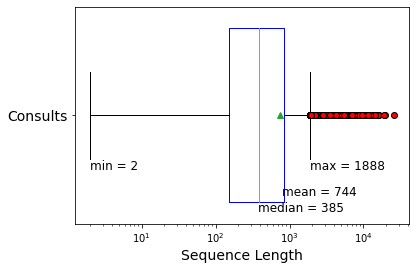

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
labels=['Consults']

red_circle = dict(markerfacecolor='red', marker='o')
data = [scrFF['length']]
m1 = scrFF['length'].mean()
st1 = scrFF['length'].std()
fig, ax = plt.subplots()
bp = plt.boxplot(data,boxprops=dict(color='blue'),labels=['Consults'],vert =False,flierprops=red_circle,widths=(0.8),showmeans=True);
plt.xlabel('Sequence Length',fontsize=14)
plt.yticks(fontsize=14)
plt.text(2, 0.75, 'min = 2', fontsize=12)
plt.text(1888, 0.75, 'max = 1888', fontsize=12)
plt.text(800, 0.63, 'mean = 744', fontsize=12)
plt.text(380, 0.56, 'median = 385', fontsize=12)

plt.semilogx();